In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

## toy data

In [14]:
torch.manual_seed(0)
N = 100 #number of samples
p = 3 #number of features each sample
k = 2 #output dimension

X = torch.randn(N, p)
W_true = torch.tensor([[2.0, -1.0],
                       [0.5, 1.5], 
                       [1.0, 0.5]])

b_true = torch.tensor([1.0, -2.0])

y = X @ W_true + b_true + torch.randn(N, k) * 0.5
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
print(f"W shape: {W_true.shape}")
print(f"b shape: {b_true.shape}")

X shape: torch.Size([100, 3])
y shape: torch.Size([100, 2])
W shape: torch.Size([3, 2])
b shape: torch.Size([2])


## Linear Regression Model

In [13]:
class LinearRegressionManual(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.w = nn.Parameter(torch.randn(input_dim,output_dim))
        self.b = nn.Parameter(torch.randn(output_dim))

    def forward(self, x):
        return x @ self.w + self.b

model = LinearRegressionManual(input_dim=p, output_dim=k)
print(f"Inital w shape: {model.w.shape}, b shape: {model.b.shape}")

Inital w shape: torch.Size([3, 2]), b shape: torch.Size([2])


## Loss function and optimizer

In [15]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.0)

## Train

In [16]:
losses = []
for epoch in range(300):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    loss.backward() #backprop get the grads
    optimizer.step() #update w and b
    optimizer.zero_grad() #PyTorch 的梯度是 累积的，每次 .backward() 都是把新梯度加到 .grad 上：不 zero_grad() ➜ 下一轮梯度会叠加 ➜ 更新错了。

    losses.append(loss.item())
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 6.0904
Epoch 50, Loss: 2.4310
Epoch 100, Loss: 1.0896
Epoch 150, Loss: 0.5930
Epoch 200, Loss: 0.4070
Epoch 250, Loss: 0.3364


## Loss curve

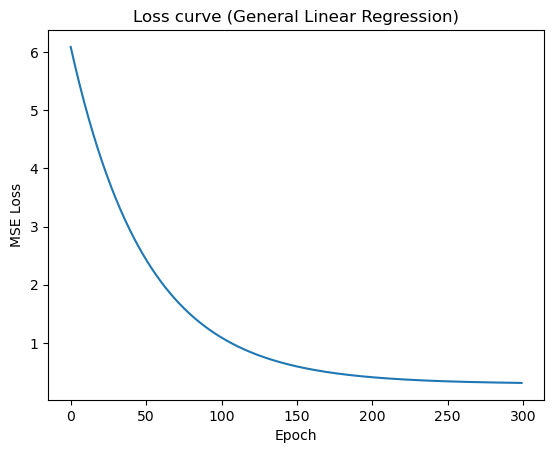

In [17]:
plt.plot(losses)
plt.title("Loss curve (General Linear Regression)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

## W/b and real weights/bias

In [18]:
print(f"Learned w:\n{model.w.data}")
print(f"True w:\n{W_true}")

print(f"Learned b:\n{model.b.data}")
print(f"True b:\n{b_true}")

Learned w:
tensor([[ 1.9357, -0.9044],
        [ 0.5721,  1.4115],
        [ 1.0846,  0.5202]])
True w:
tensor([[ 2.0000, -1.0000],
        [ 0.5000,  1.5000],
        [ 1.0000,  0.5000]])
Learned b:
tensor([ 0.9548, -1.8539])
True b:
tensor([ 1., -2.])


## Try regularization

In [19]:
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay=0.1)

In [20]:
losses = []
for epoch in range(300):
    y_pred = model(X)
    loss = criterion(y_pred, y)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

    losses.append(loss.item())
    if epoch % 50 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

Epoch 0, Loss: 0.3092
Epoch 50, Loss: 0.3169
Epoch 100, Loss: 0.3272
Epoch 150, Loss: 0.3356
Epoch 200, Loss: 0.3414
Epoch 250, Loss: 0.3453


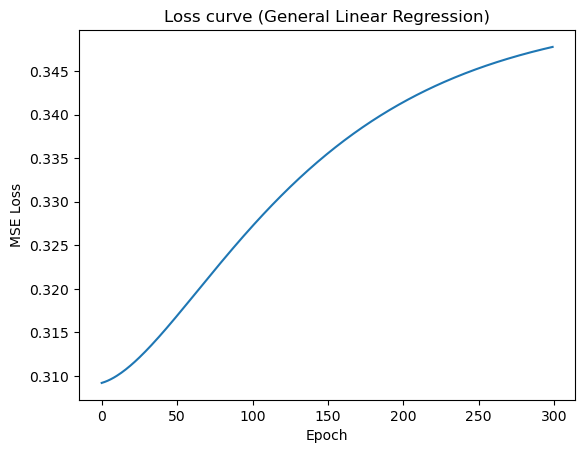

In [21]:
plt.plot(losses)
plt.title("Loss curve (General Linear Regression)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

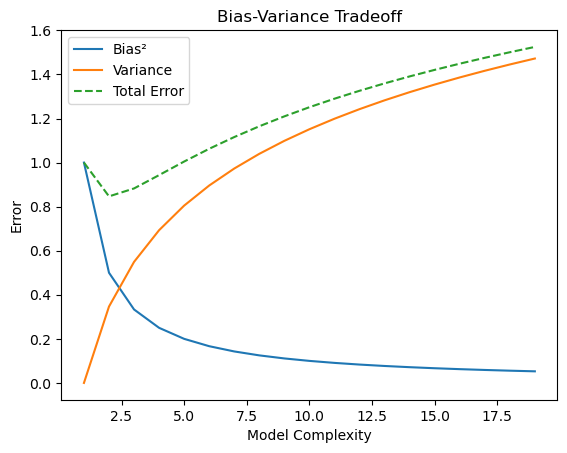

In [22]:
model_complexity = np.arange(1,20)

bias_squared = 1 / model_complexity
variance = np.log(model_complexity) / 2

total_error = bias_squared + variance

plt.plot(model_complexity, bias_squared, label="Bias²")
plt.plot(model_complexity, variance, label="Variance")
plt.plot(model_complexity, total_error, label="Total Error", linestyle='--')
plt.xlabel("Model Complexity")
plt.ylabel("Error")
plt.title("Bias-Variance Tradeoff")
plt.legend()
plt.show()